In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
# Read test dataset
path_to_data = 'data/'
X_test = pd.read_csv(path_to_data + 'Xte.csv',header = None)
Y_train = pd.read_csv(path_to_data + 'Ytr.csv')
X_train = pd.read_csv(path_to_data + 'Xtr.csv',header = None)

In [24]:
image = np.zeros((1024,3))
imadeid = 1
for i in range(1024):
        for k in range(3):
            image[i,k] =  X_test.values[imadeid,k*1024+i] / LA.norm(X_test.values[imadeid,k*1024+i])
image_reshaped_1 = image.reshape((32,32,3))

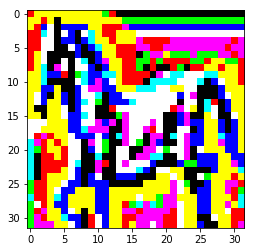

In [25]:
plt.imshow(image_reshaped_1)
plt.show()

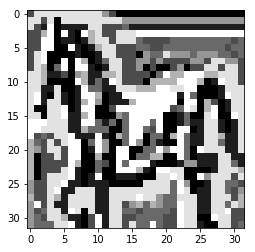

In [26]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
gray = rgb2gray(image_reshaped_1)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [3]:
X_train.shape

(5000, 3073)

In [4]:
Y_tot_test = Y_train["Prediction"].values[-10:]

In [5]:
Y_tot_test

array([5, 2, 5, 8, 0, 4, 3, 1, 7, 5])

In [28]:
from skimage.feature import hog

# Compute HOG vector
HOG = np.zeros((5000,324))
for i in range(len(X_train)):
    im = X_train.iloc[i].values.reshape(3,32,32).transpose(1,2,0)
    imGray = 0.2126 * im[:,:,0] + 0.7152 * im[:,:,1] + 0.0722 * im[:,:,2]
    HOG[i,:] = hog(imGray, cells_per_block=(2,2))



ValueError: total size of new array must be unchanged